## Importing the Dependencies

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

## Exploratary Data Analysis

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv(r"C:\Users\Admin\Downloads\diabetes.csv")

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
diabetes_dataset = diabetes_dataset.rename(columns={"Pregnancies" :"time_pregnant", 
                        "Glucose" : "glucose_tolerance_test", 
                        "BloodPressure" : "blood_pressure", 
                        "SkinThickness" : "skin_thickness", 
                        "Insulin" : "insulin", 
                        "BMI" : "bmi", 
                        "DiabetesPedigreeFunction" : "pidgree_function",
                        "Age" : "age",
                        "Outcome" : "has_diabetes"})

In [8]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,time_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pidgree_function,age,has_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_dataset.dtypes

time_pregnant               int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pidgree_function          float64
age                         int64
has_diabetes                int64
dtype: object

In [11]:
diabetes_dataset.isnull().sum()/len(diabetes_dataset)*100

time_pregnant             0.0
glucose_tolerance_test    0.0
blood_pressure            0.0
skin_thickness            0.0
insulin                   0.0
bmi                       0.0
pidgree_function          0.0
age                       0.0
has_diabetes              0.0
dtype: float64

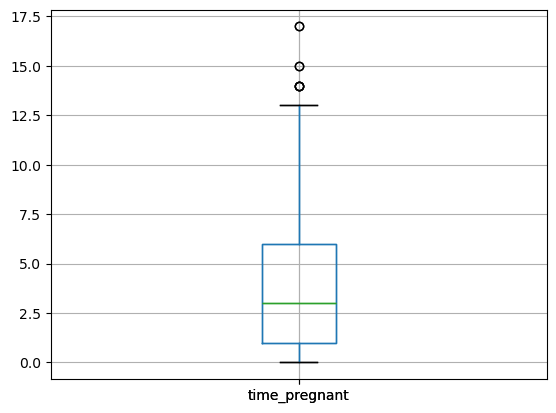

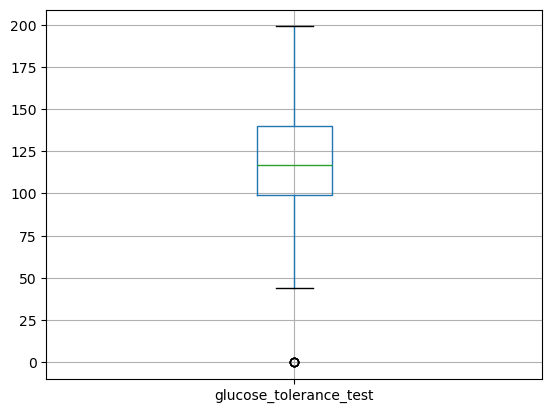

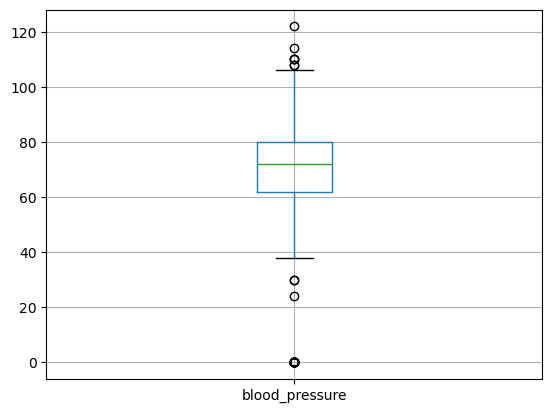

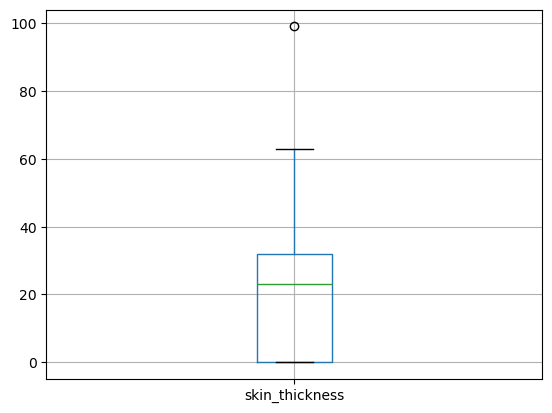

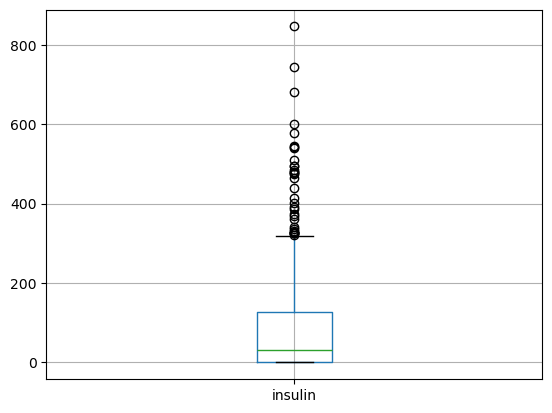

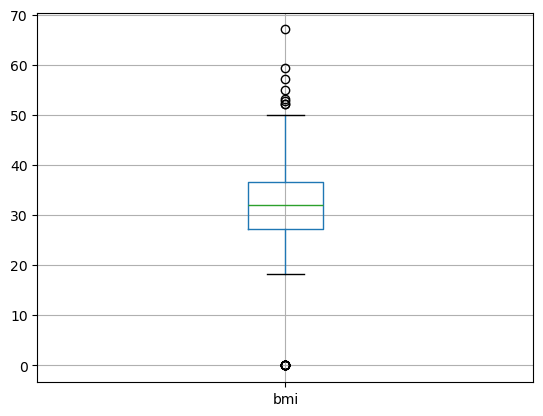

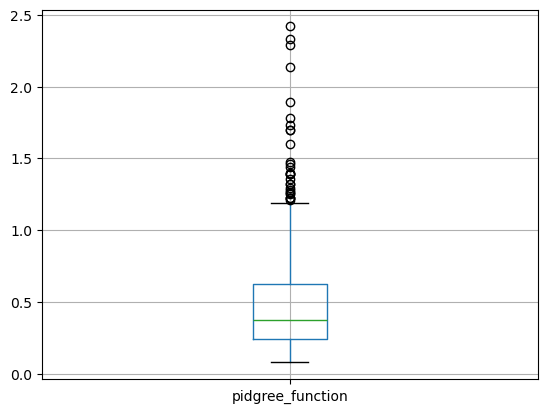

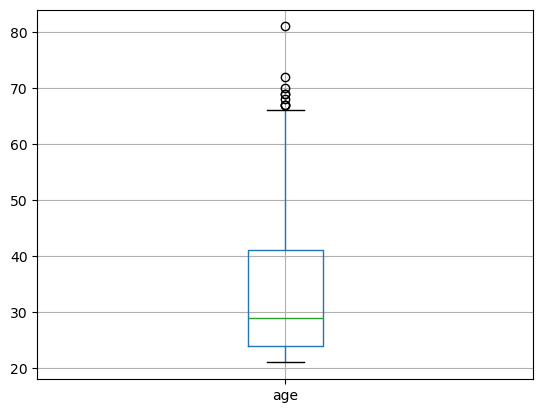

In [15]:
import matplotlib.pyplot as plt

colname=[]
for x in diabetes_dataset.columns[:-1]:
    if diabetes_dataset[x].dtype=="int64" or diabetes_dataset[x].dtype=="float64":
        colname.append(x)

for x in colname:
    diabetes_dataset.boxplot(column=x)
    plt.show()

In [16]:
diabetes_dataset['has_diabetes'].value_counts()

has_diabetes
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [85]:
diabetes_dataset.groupby("has_diabetes").mean()

,time_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pidgree_function,age
has_diabetes,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Spliting the data

In [18]:
#into X & Y
X = diabetes_dataset.iloc[:,:-1].values
Y = diabetes_dataset.iloc[:, -1].values

In [69]:
#Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25,random_state=11111)

In [70]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [71]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: has_diabetes, Length: 768, dtype: int64


In [72]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


## Training the model by Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

In [74]:
#train the model object
classifier.fit(X_train,Y_train)

LogisticRegression()

In [75]:
Y_pred=classifier.predict(X_test)

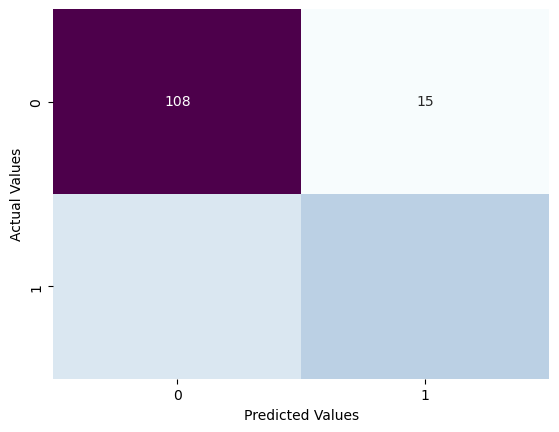

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       123
           1       0.73      0.58      0.65        69

    accuracy                           0.77       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192

Accuracy of the model:  0.7708333333333334


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

## Data Standardization

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(X)

StandardScaler()

In [42]:
standardized_data = scaler.transform(X)

In [43]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [45]:
X = standardized_data
Y = diabetes_dataset['has_diabetes']

In [46]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: has_diabetes, Length: 768, dtype: int64


## Training the Model with SVC

In [77]:
classifier = svm.SVC(kernel='linear')

In [78]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Model Evaluation

## Accuracy Score

In [79]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [80]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7847222222222222


In [81]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [82]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.78125


## Making a Predictive System

In [83]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic
